# Решение задачи кредитного скоринга методами бинарной классификации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-loan.csv')

In [3]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [4]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


## Избавимся от записей, для которых не определена целевая переменная

In [6]:
df = df.dropna()

In [7]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [8]:
df = df.drop_duplicates()

In [9]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


## Оценим корреляцию признаков

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import seaborn as sns

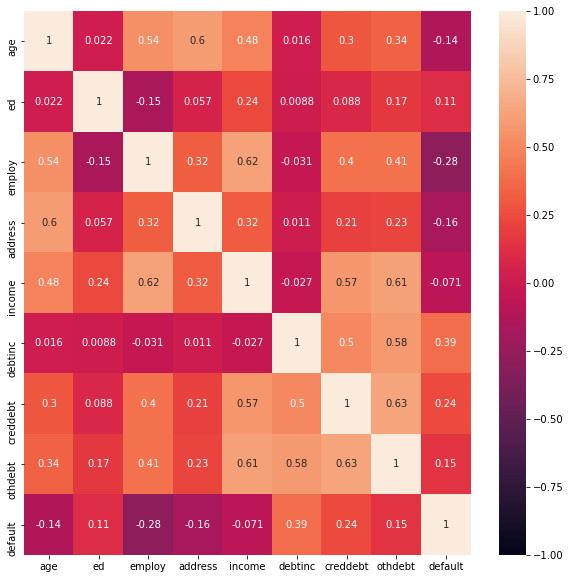

In [9]:
corr_Matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_Matrix, vmin=-1, vmax=1, annot=True)
plt.show()

### Судя по значениям матрицы корреляции, ни одна переменная сильно не коррелирует с целевой переенной, как и между собой

## Оценим сбалансированность классов в датасете

In [10]:
df.default.value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

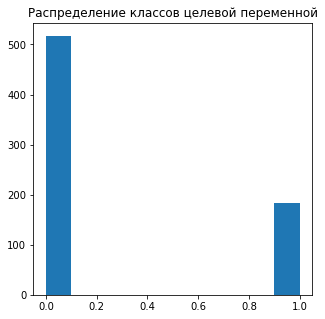

In [11]:
plt.figure(figsize=(5,5))
plt.hist(df.default)
plt.title('Распределение классов целевой переменной')
plt.show()

## Классы сильно несбалансированы, поэтому прибегнем к upsampling'у

In [12]:
rat = df['default'].value_counts()[0]//df['default'].value_counts()[1]
df1 = df.loc[df['default']==1]
df1 = df1.loc[df1.index.repeat(rat)]
df = pd.concat([df.loc[df['default']==0], df1]).reset_index()

In [13]:
df['default'].value_counts()

0.0    517
1.0    366
Name: default, dtype: int64

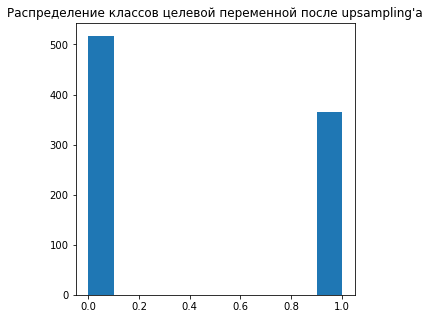

In [14]:
plt.figure(figsize=(5,5))
plt.hist(df.default)
plt.title("Распределение классов целевой переменной после upsampling'а")
plt.show()

## Оценим распределения признаков, так как это позволит нам, возможно, создать новые категориальные переменные

In [15]:
def build_histograms(df):
    for column in df.drop('default', axis=1):
        plt.figure(figsize=(10,5))
        plt.hist(df[column])
        plt.title(f"Распределение {column}")
        plt.show()

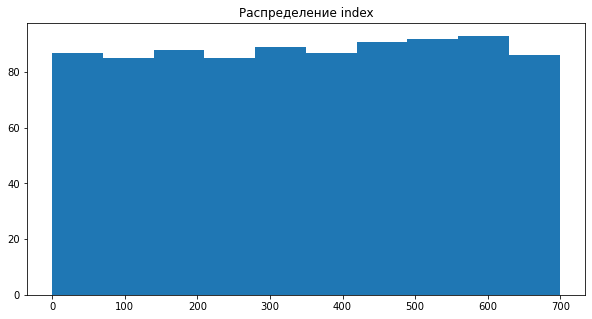

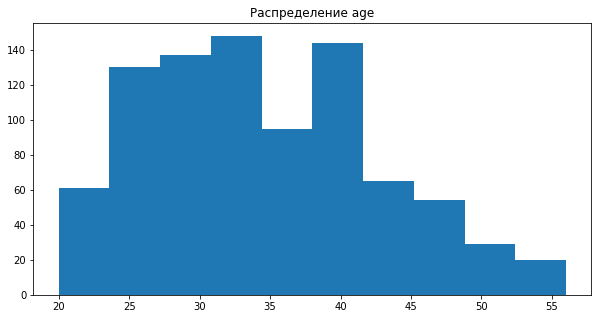

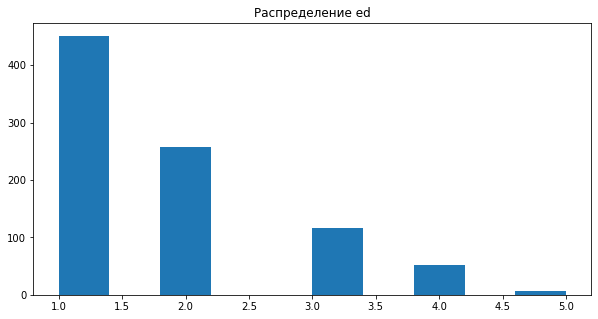

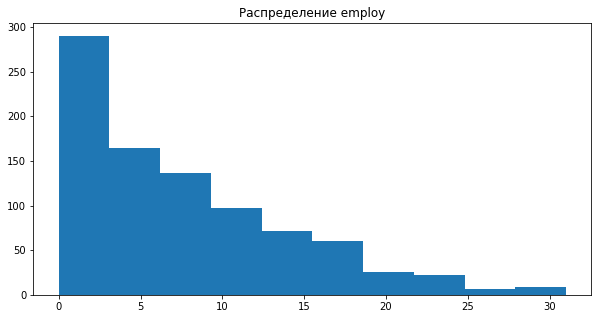

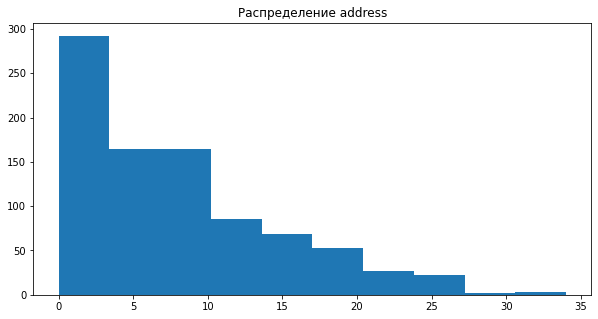

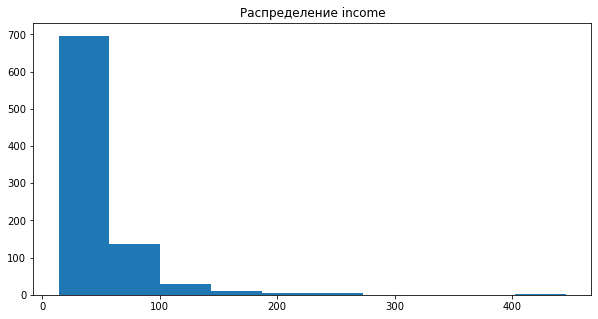

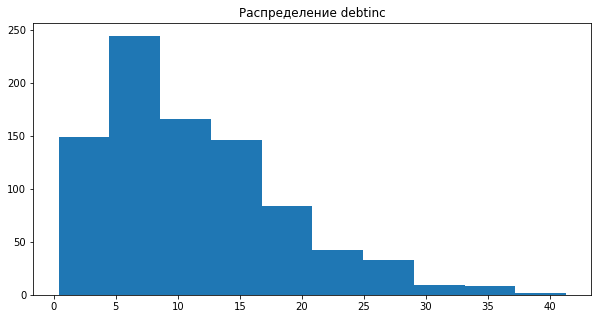

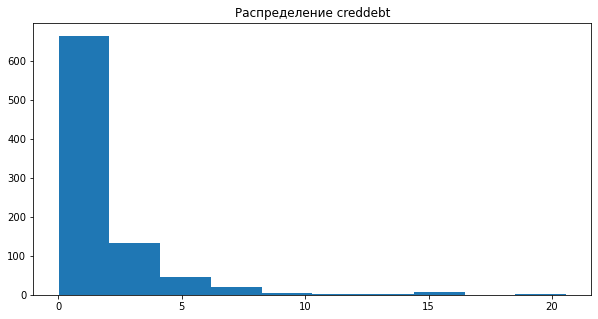

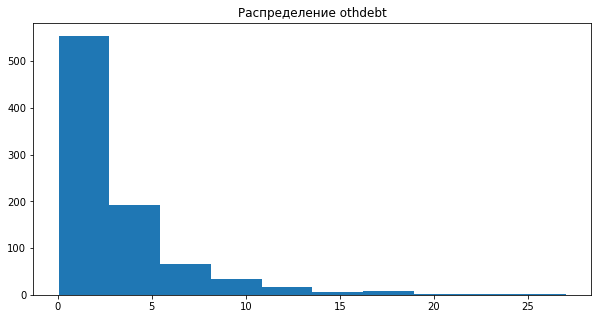

In [16]:
build_histograms(df)

## В первом признаке пристутствует небольшая бимодальность, но она не дает явно выделить, например, две области значений, которые могли бы дать подспорье для введения дополнительного категориального признака.

## Оценим также распределение значений признаков относительно целевой переменной при помощи ящика с усами. Это поможет нам лучше понять, какие признаки действительно разделяют нашу целевую перменную

In [17]:
df=df.drop('index',axis=1)

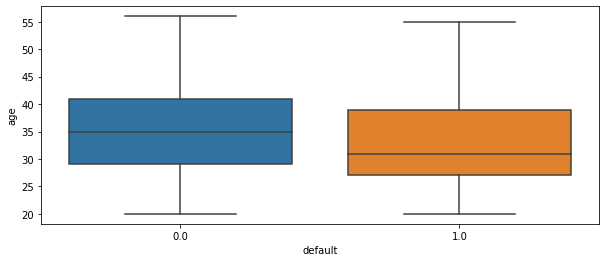

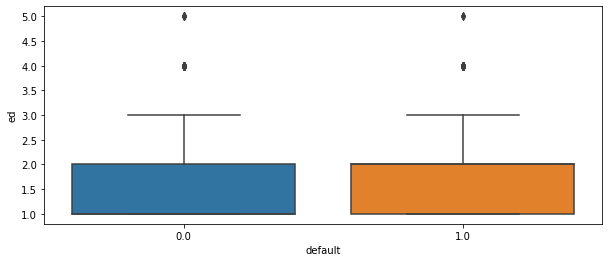

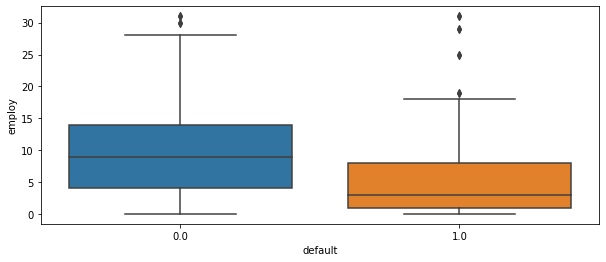

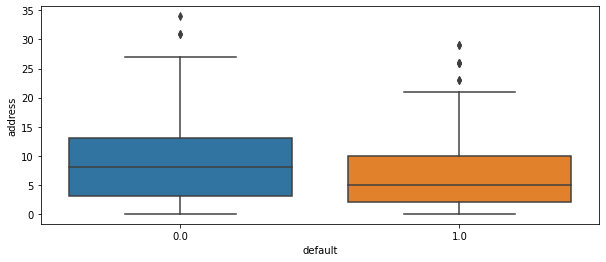

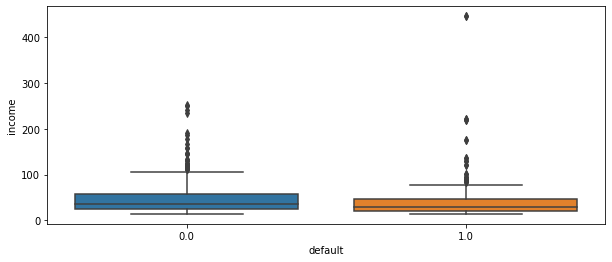

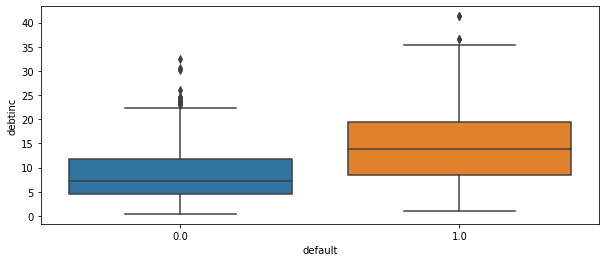

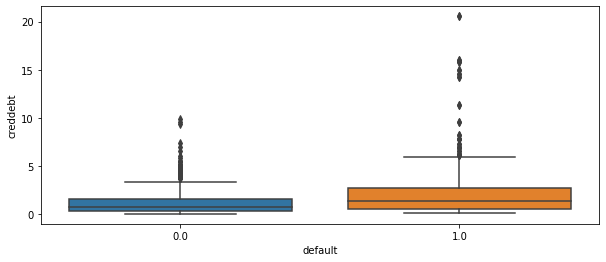

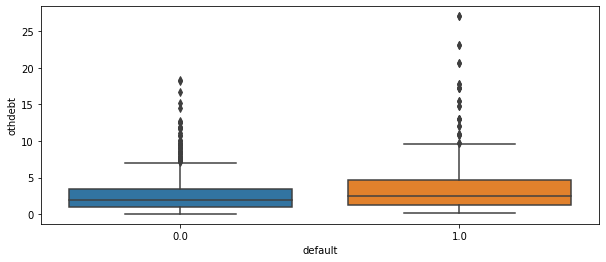

In [18]:
for column in df.drop('default', axis=1).columns:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='default', y=column, data = df)
    plt.show()

## Займемся определением значимости признаков. Для этого воспользуемся простейшей моделью логистической регрессии из пакета statsmodels.discrete.discrete_model. На основании summary модели сделаем вывод о значимости признаков, учитывая их t-статичтику и соответствующий p-value.

In [19]:
import statsmodels.discrete.discrete_model as sm
import numpy as np

X=df.drop('default', axis=1)
X['constant'] = np.ones(df.shape[0])
model = sm.Logit(df['default'], X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.456551
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  883
Model:                          Logit   Df Residuals:                      874
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 May 2022   Pseudo R-squ.:                  0.3271
Time:                        11:00:12   Log-Likelihood:                -403.13
converged:                       True   LL-Null:                       -599.07
Covariance Type:            nonrobust   LLR p-value:                 1.022e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0362      0.014      2.528      0.011       0.008       0.064
ed             0.1111      0.102      1.088      0.277      -0.089       0.311
employ        -0.2555      0.026     -9.679      0.000      -0.307      -0.204
address       -0.1033      0.019     -5.453      0.000      -0.140      -0.066
income        -0.0091      0.007     -1.396      0.163      -0.022       0.004
debtinc        0.0692      0.026      2.689      0.007       0.019       0.120
creddebt       0.6175      0.094      6.539      0.000       0.432       0.803
othdebt        0.0523      0.063      0.835      0.404      -0.071       0.175
constant      -0.9445      0.503     -1.877      0.061      -1.931       0.042
==============================================================================
"""

## Как видим, на уровне значимости 0.05 у нас отпадают признаки ed (уровень образования), income (уровень дохода) и othdebt(). При этом оставим консантный признак, так как его уровень значимости лишь слегка превосходит порог 0.05.

In [20]:
df['constant'] = np.ones(df.shape[0])

In [21]:
new_df = df.drop(['ed', 'income', 'othdebt'], axis=1)

In [22]:
new_df

,age,employ,address,debtinc,creddebt,default,constant
0,27,10,6,17.3,1.362202,0.0,1.0
1,40,15,14,5.5,0.856075,0.0,1.0
2,41,15,14,2.9,2.658720,0.0,1.0
3,41,5,5,10.2,0.392700,0.0,1.0
4,39,20,9,30.6,3.833874,0.0,1.0
...,...,...,...,...,...,...,...
878,34,10,1,10.3,2.501664,1.0,1.0
879,53,0,26,28.9,2.754459,1.0,1.0
880,53,0,26,28.9,2.754459,1.0,1.0
881,36,6,15,4.6,0.262062,1.0,1.0


## Построим и оценим стандартную модель логистической регрессии. Затем проведем повторный анализ признаков, попробуем добавить какие-нибудь дополнительные признаки, напимер, категорию стажа работы (маленький, большой стаж).

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('default', axis=1), new_df['default'], 
                                                    stratify=new_df['default'], shuffle=True, random_state=0)

In [24]:
print(f'y_train values:\n{y_train.value_counts()}')
print(f'y_test values:\n{y_test.value_counts()}')

y_train values:
0.0    388
1.0    274
Name: default, dtype: int64
y_test values:
0.0    129
1.0     92
Name: default, dtype: int64


## Сразу определим функцию, которая будет считать нам все основные метрики и строить ROC-AUC кривую.

In [25]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score, 
                             recall_score, precision_score, f1_score)
def estimate_model(pred, true, probab, accuracy):
    recall = recall_score(true, pred)
    precision = precision_score(true, pred)
    f1 = f1_score(true, pred)
    
    print(f'SCORES:\nrecall: {round(recall, 2)}\nprecision: {round(precision, 2)}\nf1: {round(f1, 2)}\naccuracy: {round(accuracy, 2)}')
    
    roc_auc_s = roc_auc_score(true, probab)
    fpr, tpr, _ = roc_curve(true, probab)
    
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='orange', label='model')
    plt.plot([0,1], [0,1], color='blue', label='baseline', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.title(f'ROC-AUC. Score: {round(roc_auc_s, 2)}')
    plt.show()
    

SCORES:
recall: 0.68
precision: 0.72
f1: 0.7
accuracy: 0.76


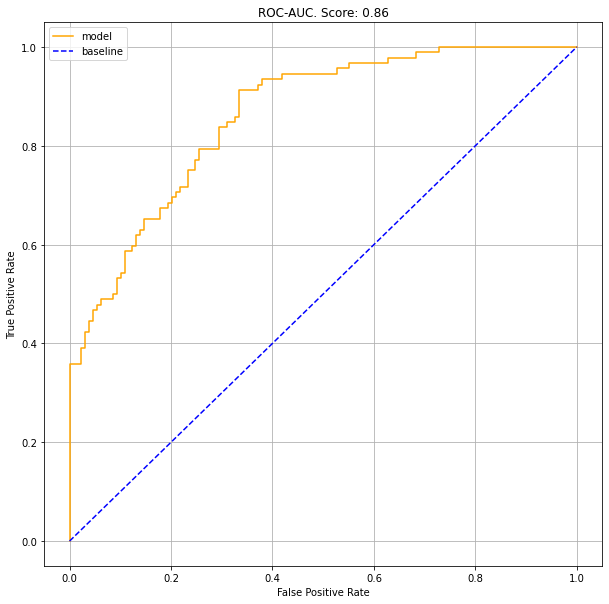

In [26]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver="liblinear")
logr.fit(X_train, y_train)
probab = logr.decision_function(X_test)
pred = logr.predict(X_test)
accuracy = logr.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

## Судя по некоторым метрикам, качество могло бы быть и получше... Добавим некоторые признаки, дополняющие, например, опыт работы и возраст.

In [27]:
new_df['employ_s'] = [1 if empl <= 7 else 0 for empl in new_df.employ]
new_df['employ_b'] = [1 if empl > 7 else 0 for empl in new_df.employ]
new_df['debtinc_s'] = [1 if cr <= 13 else 0 for cr in new_df.debtinc]
new_df['debtinc_b'] = [1 if cr > 13 else 0 for cr in new_df.debtinc]

In [28]:
new_df

,age,employ,address,debtinc,creddebt,default,constant,employ_s,employ_b,debtinc_s,debtinc_b
0,27,10,6,17.3,1.362202,0.0,1.0,0,1,0,1
1,40,15,14,5.5,0.856075,0.0,1.0,0,1,1,0
2,41,15,14,2.9,2.658720,0.0,1.0,0,1,1,0
3,41,5,5,10.2,0.392700,0.0,1.0,1,0,1,0
4,39,20,9,30.6,3.833874,0.0,1.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
878,34,10,1,10.3,2.501664,1.0,1.0,0,1,1,0
879,53,0,26,28.9,2.754459,1.0,1.0,1,0,0,1
880,53,0,26,28.9,2.754459,1.0,1.0,1,0,0,1
881,36,6,15,4.6,0.262062,1.0,1.0,1,0,1,0


## Оценим теперь модель, построенную на основании всех признаков с дополнениями

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('default', axis=1), new_df['default'], 
                                                    stratify=new_df['default'], shuffle=True, random_state=0)

SCORES:
recall: 0.72
precision: 0.7
f1: 0.71
accuracy: 0.76


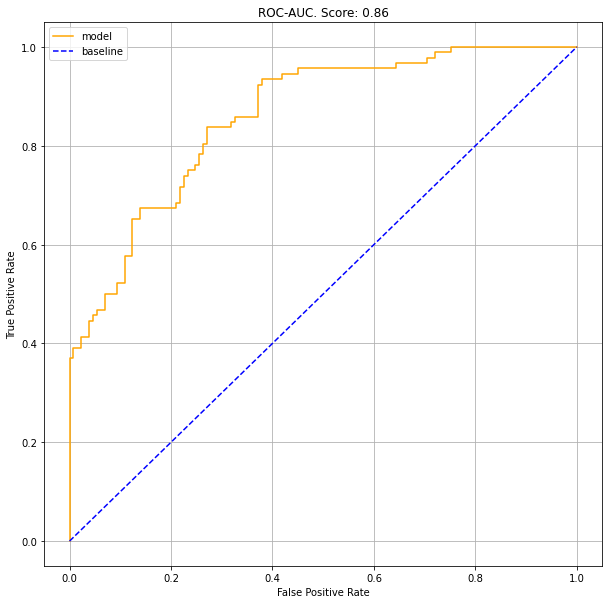

In [30]:
logr = LogisticRegression(solver="liblinear")
logr.fit(X_train, y_train)
probab = logr.decision_function(X_test)
pred = logr.predict(X_test)
accuracy = logr.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

## Как видно, мы увеличили значение метрики recall, при этом пожертвовав precision. Accuracy также достаточно хорошо повысилась. Предлагаю оставить именно такие признаки и работать уже исключительно с моделями. Для сравнения проведем те же операции для датасета с начальными признаками

In [31]:
new_df = df.copy()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('default', axis=1), new_df['default'], 
                                                    stratify=new_df['default'], shuffle=True, random_state=0)

SCORES:
recall: 0.67
precision: 0.7
f1: 0.69
accuracy: 0.75


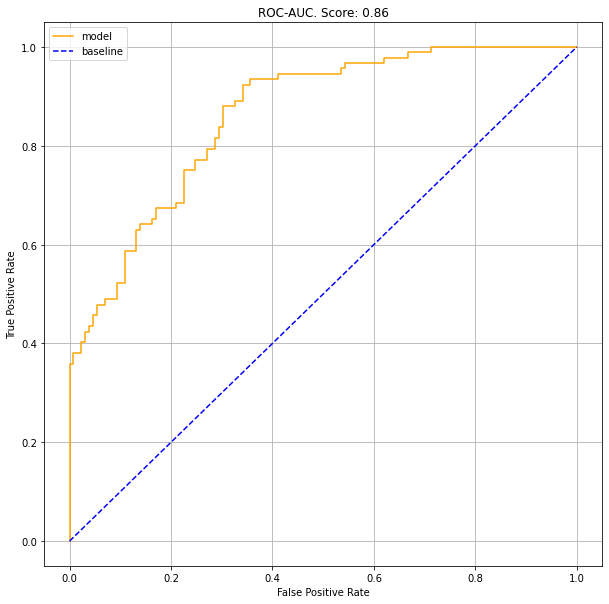

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

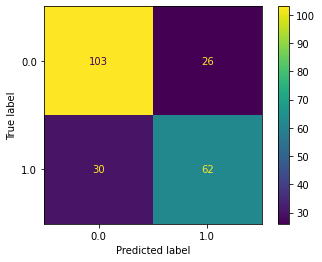

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
logr = LogisticRegression(solver="liblinear")
logr.fit(X_train, y_train)
probab = logr.decision_function(X_test)
pred = logr.predict(X_test)
accuracy = logr.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(logr, X_test, y_test)  
plt.show()

SCORES:
recall: 0.71
precision: 0.7
f1: 0.7
accuracy: 0.75


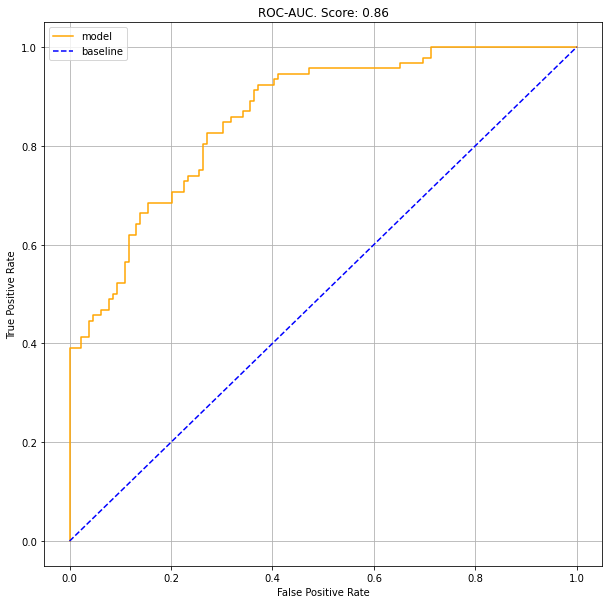

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

<Figure size 432x288 with 0 Axes>

In [34]:
new_df['employ_s'] = [1 if empl <= 7 else 0 for empl in new_df.employ]
new_df['employ_b'] = [1 if empl > 7 else 0 for empl in new_df.employ]
new_df['debtinc_s'] = [1 if cr <= 13 else 0 for cr in new_df.debtinc]
new_df['debtinc_b'] = [1 if cr > 13 else 0 for cr in new_df.debtinc]

X_train, X_test, y_train, y_test = train_test_split(new_df.drop('default', axis=1), new_df['default'], 
                                                    stratify=new_df['default'], shuffle=True, random_state=0)

logr = LogisticRegression(solver="liblinear")
logr.fit(X_train, y_train)
probab = logr.decision_function(X_test)
pred = logr.predict(X_test)
accuracy = logr.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

## Как видно, значения метрик меньше, чем с датасетом с отобранными признаками. Перейдем к использованию различных моделей для решения нашей задачи

In [35]:
new_df = df.drop(['ed', 'income', 'othdebt'], axis=1)
new_df['employ_s'] = [1 if empl <= 7 else 0 for empl in new_df.employ]
new_df['employ_b'] = [1 if empl > 7 else 0 for empl in new_df.employ]
new_df['debtinc_s'] = [1 if cr <= 13 else 0 for cr in new_df.debtinc]
new_df['debtinc_b'] = [1 if cr > 13 else 0 for cr in new_df.debtinc]

X_train, X_test, y_train, y_test = train_test_split(new_df.drop('default', axis=1), new_df['default'], 
                                                    stratify=new_df['default'], shuffle=True, random_state=0)

# LogisticRegression

SCORES:
recall: 0.72
precision: 0.7
f1: 0.71
accuracy: 0.76


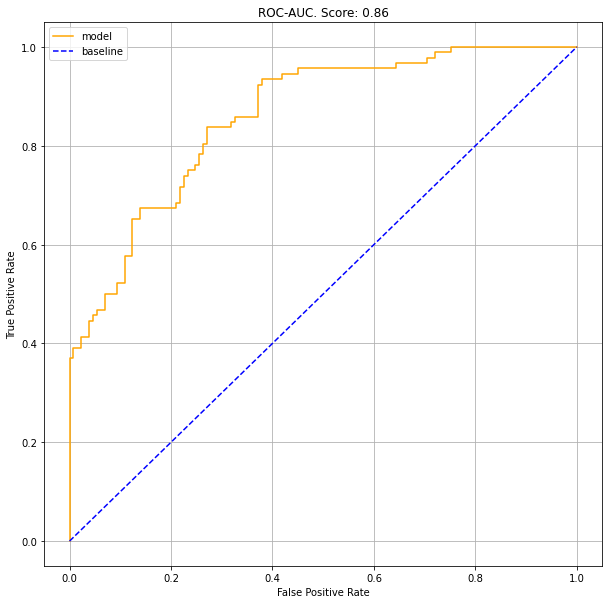

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

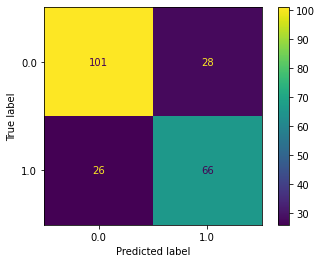

In [36]:
logr = LogisticRegression(solver="liblinear")
logr.fit(X_train, y_train)
probab = [x[1] for x in logr.predict_proba(X_test)]
pred = logr.predict(X_test)
accuracy = logr.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(logr, X_test, y_test)  
plt.show()

# KNN-classifier

SCORES:
recall: 0.68
precision: 0.71
f1: 0.7
accuracy: 0.75


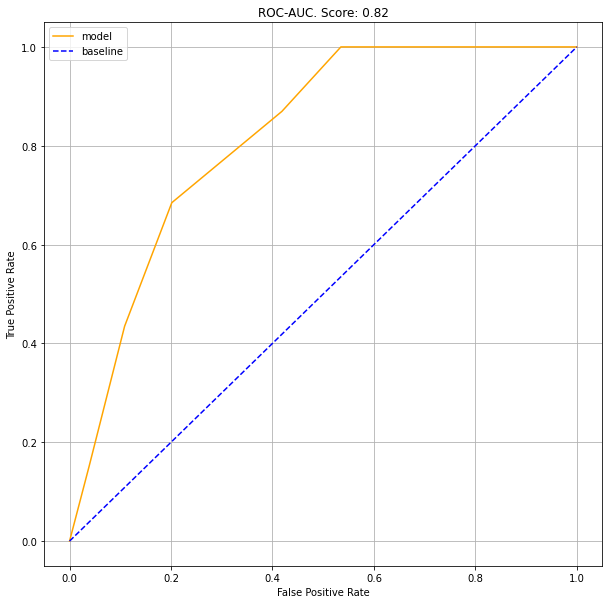

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

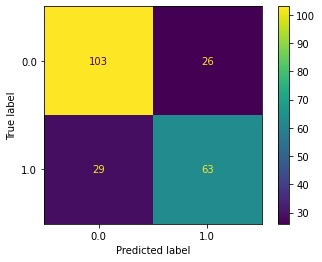

In [37]:
from sklearn.neighbors import KNeighborsClassifier as knn
model = knn()
model.fit(X_train, y_train)
probab = [x[1] for x in model.predict_proba(X_test)]
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# DecisionTreeClassifier

SCORES:
recall: 0.91
precision: 0.72
f1: 0.81
accuracy: 0.82


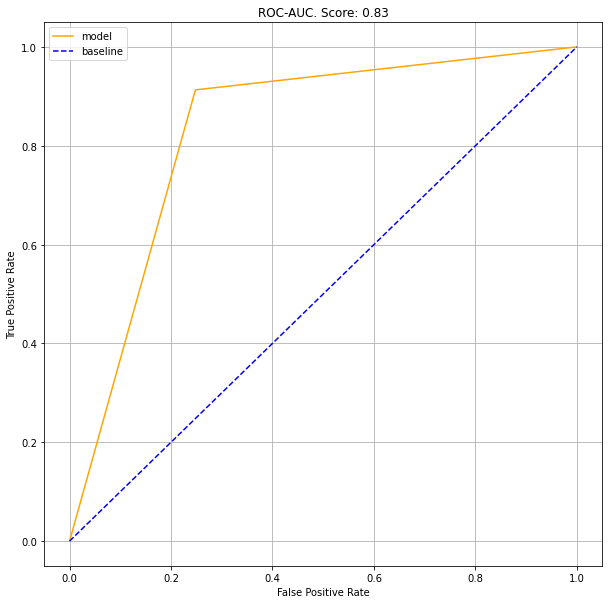

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

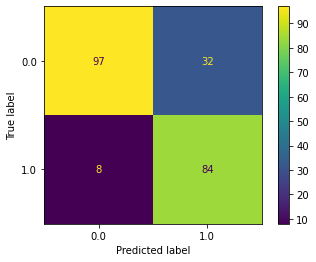

In [38]:
from sklearn.tree import DecisionTreeClassifier as tree
model = tree()
model.fit(X_train, y_train)
probab = [x[1] for x in model.predict_proba(X_test)]
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# NeuralNetwork

SCORES:
recall: 0.68
precision: 0.7
f1: 0.69
accuracy: 0.75


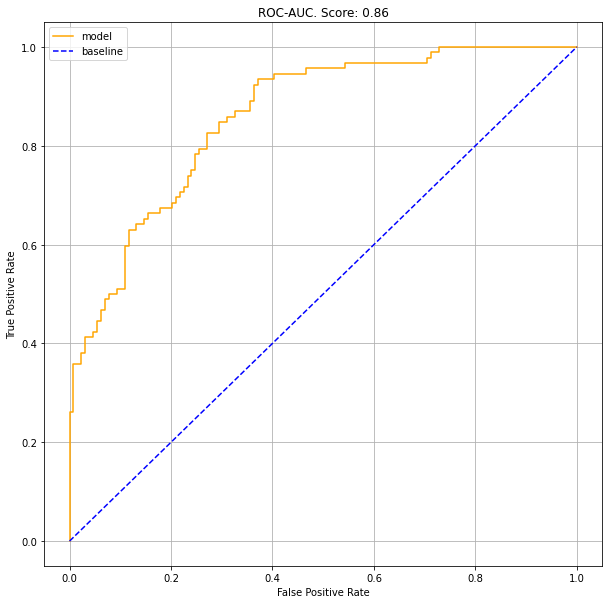

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

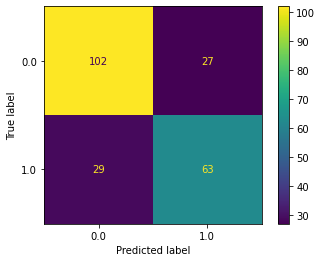

In [39]:
from sklearn.neural_network import MLPClassifier as mlp
model = mlp(activation='logistic')
model.fit(X_train, y_train)
probab = [x[1] for x in model.predict_proba(X_test)]
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# GradientBoosting

SCORES:
recall: 0.78
precision: 0.74
f1: 0.76
accuracy: 0.8


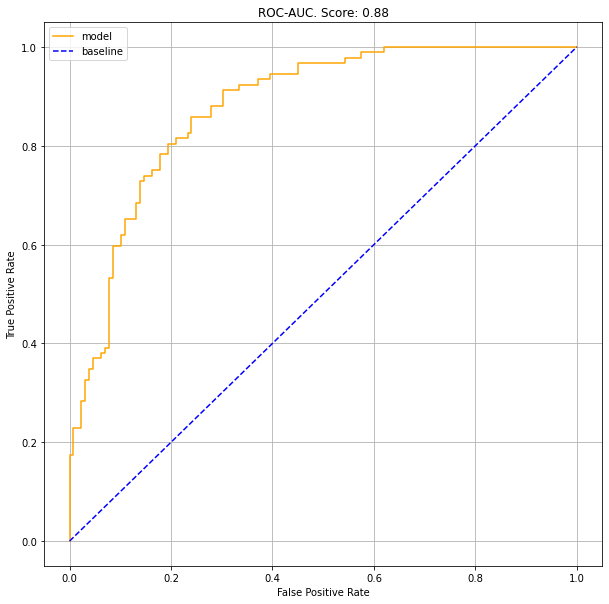

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

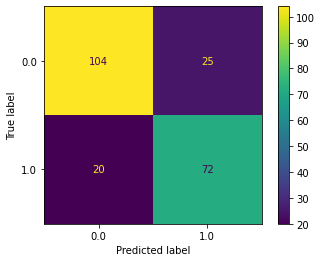

In [40]:
from sklearn.ensemble import GradientBoostingClassifier as xgb
model = xgb()
model.fit(X_train, y_train)
probab = [x[1] for x in model.predict_proba(X_test)]
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Из пяти рассмотренных моделей лучшей оказалась модель на основе решающих деревьев. Второй решено выбрать модель градиентного бустинга. Попробуем еще улучшить их качество подобрав гиперпараметры.

In [41]:
from sklearn.model_selection import GridSearchCV
tree_parameters = {
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"]
}
xgb_parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.001, 0.01, 0.1, 1]
}


## XGB parameters tuning

In [393]:
model = xgb()
cv = GridSearchCV(model, xgb_parameters, cv=5, scoring='recall')
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='roc_auc')

In [77]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [395]:
display(cv)

Best parameters are: {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 250}


0.692 + or -0.026 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.763 + or -0.033 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.815 + or -0.026 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.838 + or -0.025 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.798 + or -0.038 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.819 + or -0.021 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.86 + or -0.024 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.869 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.809 + or -0.033 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.838 + or -0.02 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.876 + or -0.018 for the {'learning_rate': 0.01, 'max_depth

# DecisionTree parameters tuning

In [44]:
model = tree()
cv = GridSearchCV(model, tree_parameters, cv=5, scoring='recall')
cv.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
D:\Anaconda\lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [46]:
cv.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

# XGBoost с подобранными параметрами по roc_auc-best model

SCORES:
recall: 0.96
precision: 0.81
f1: 0.88
accuracy: 0.89


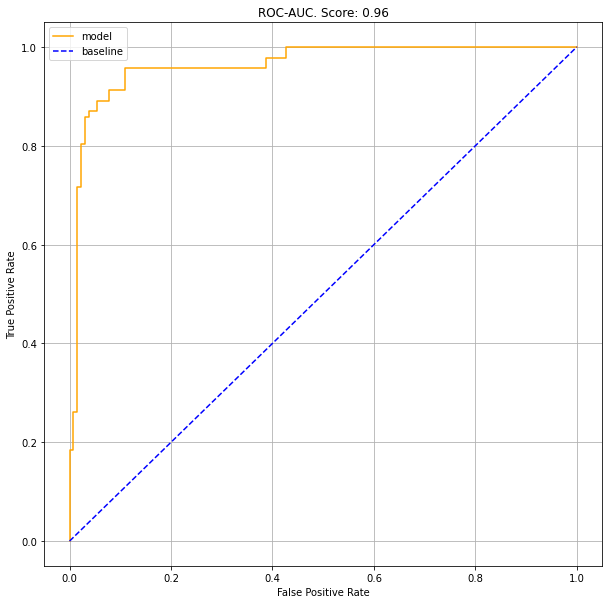

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

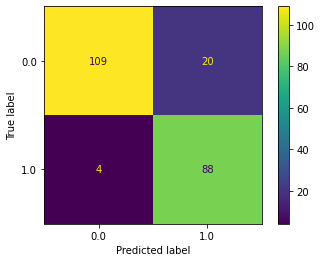

In [422]:
#params = {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 250}
model = xgb(learning_rate=0.1, max_depth=9, n_estimators=250, random_state=0)
model.fit(X_train, y_train)
probab = [x[1] for x in model.predict_proba(X_test)]
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

## DecisionTreeClassifier с подобранными параметрами по f1

SCORES:
recall: 0.93
precision: 0.7
f1: 0.8
accuracy: 0.81


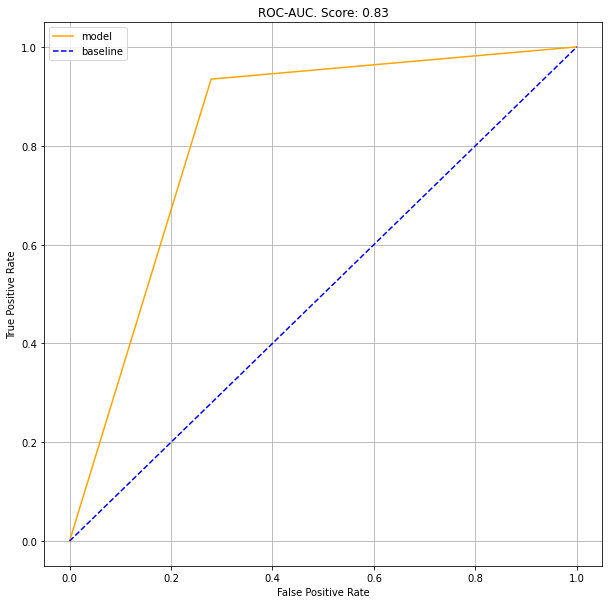

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

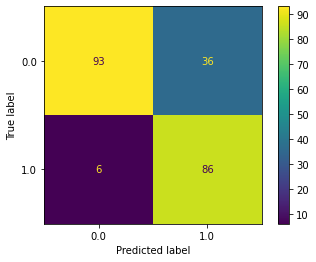

In [47]:
params={'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
model = tree(criterion='entropy', splitter='best')
model.fit(X_train, y_train)
probab = [x[1] for x in model.predict_proba(X_test)]
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
estimate_model(pred, y_test, probab, accuracy)

plt.figure()
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

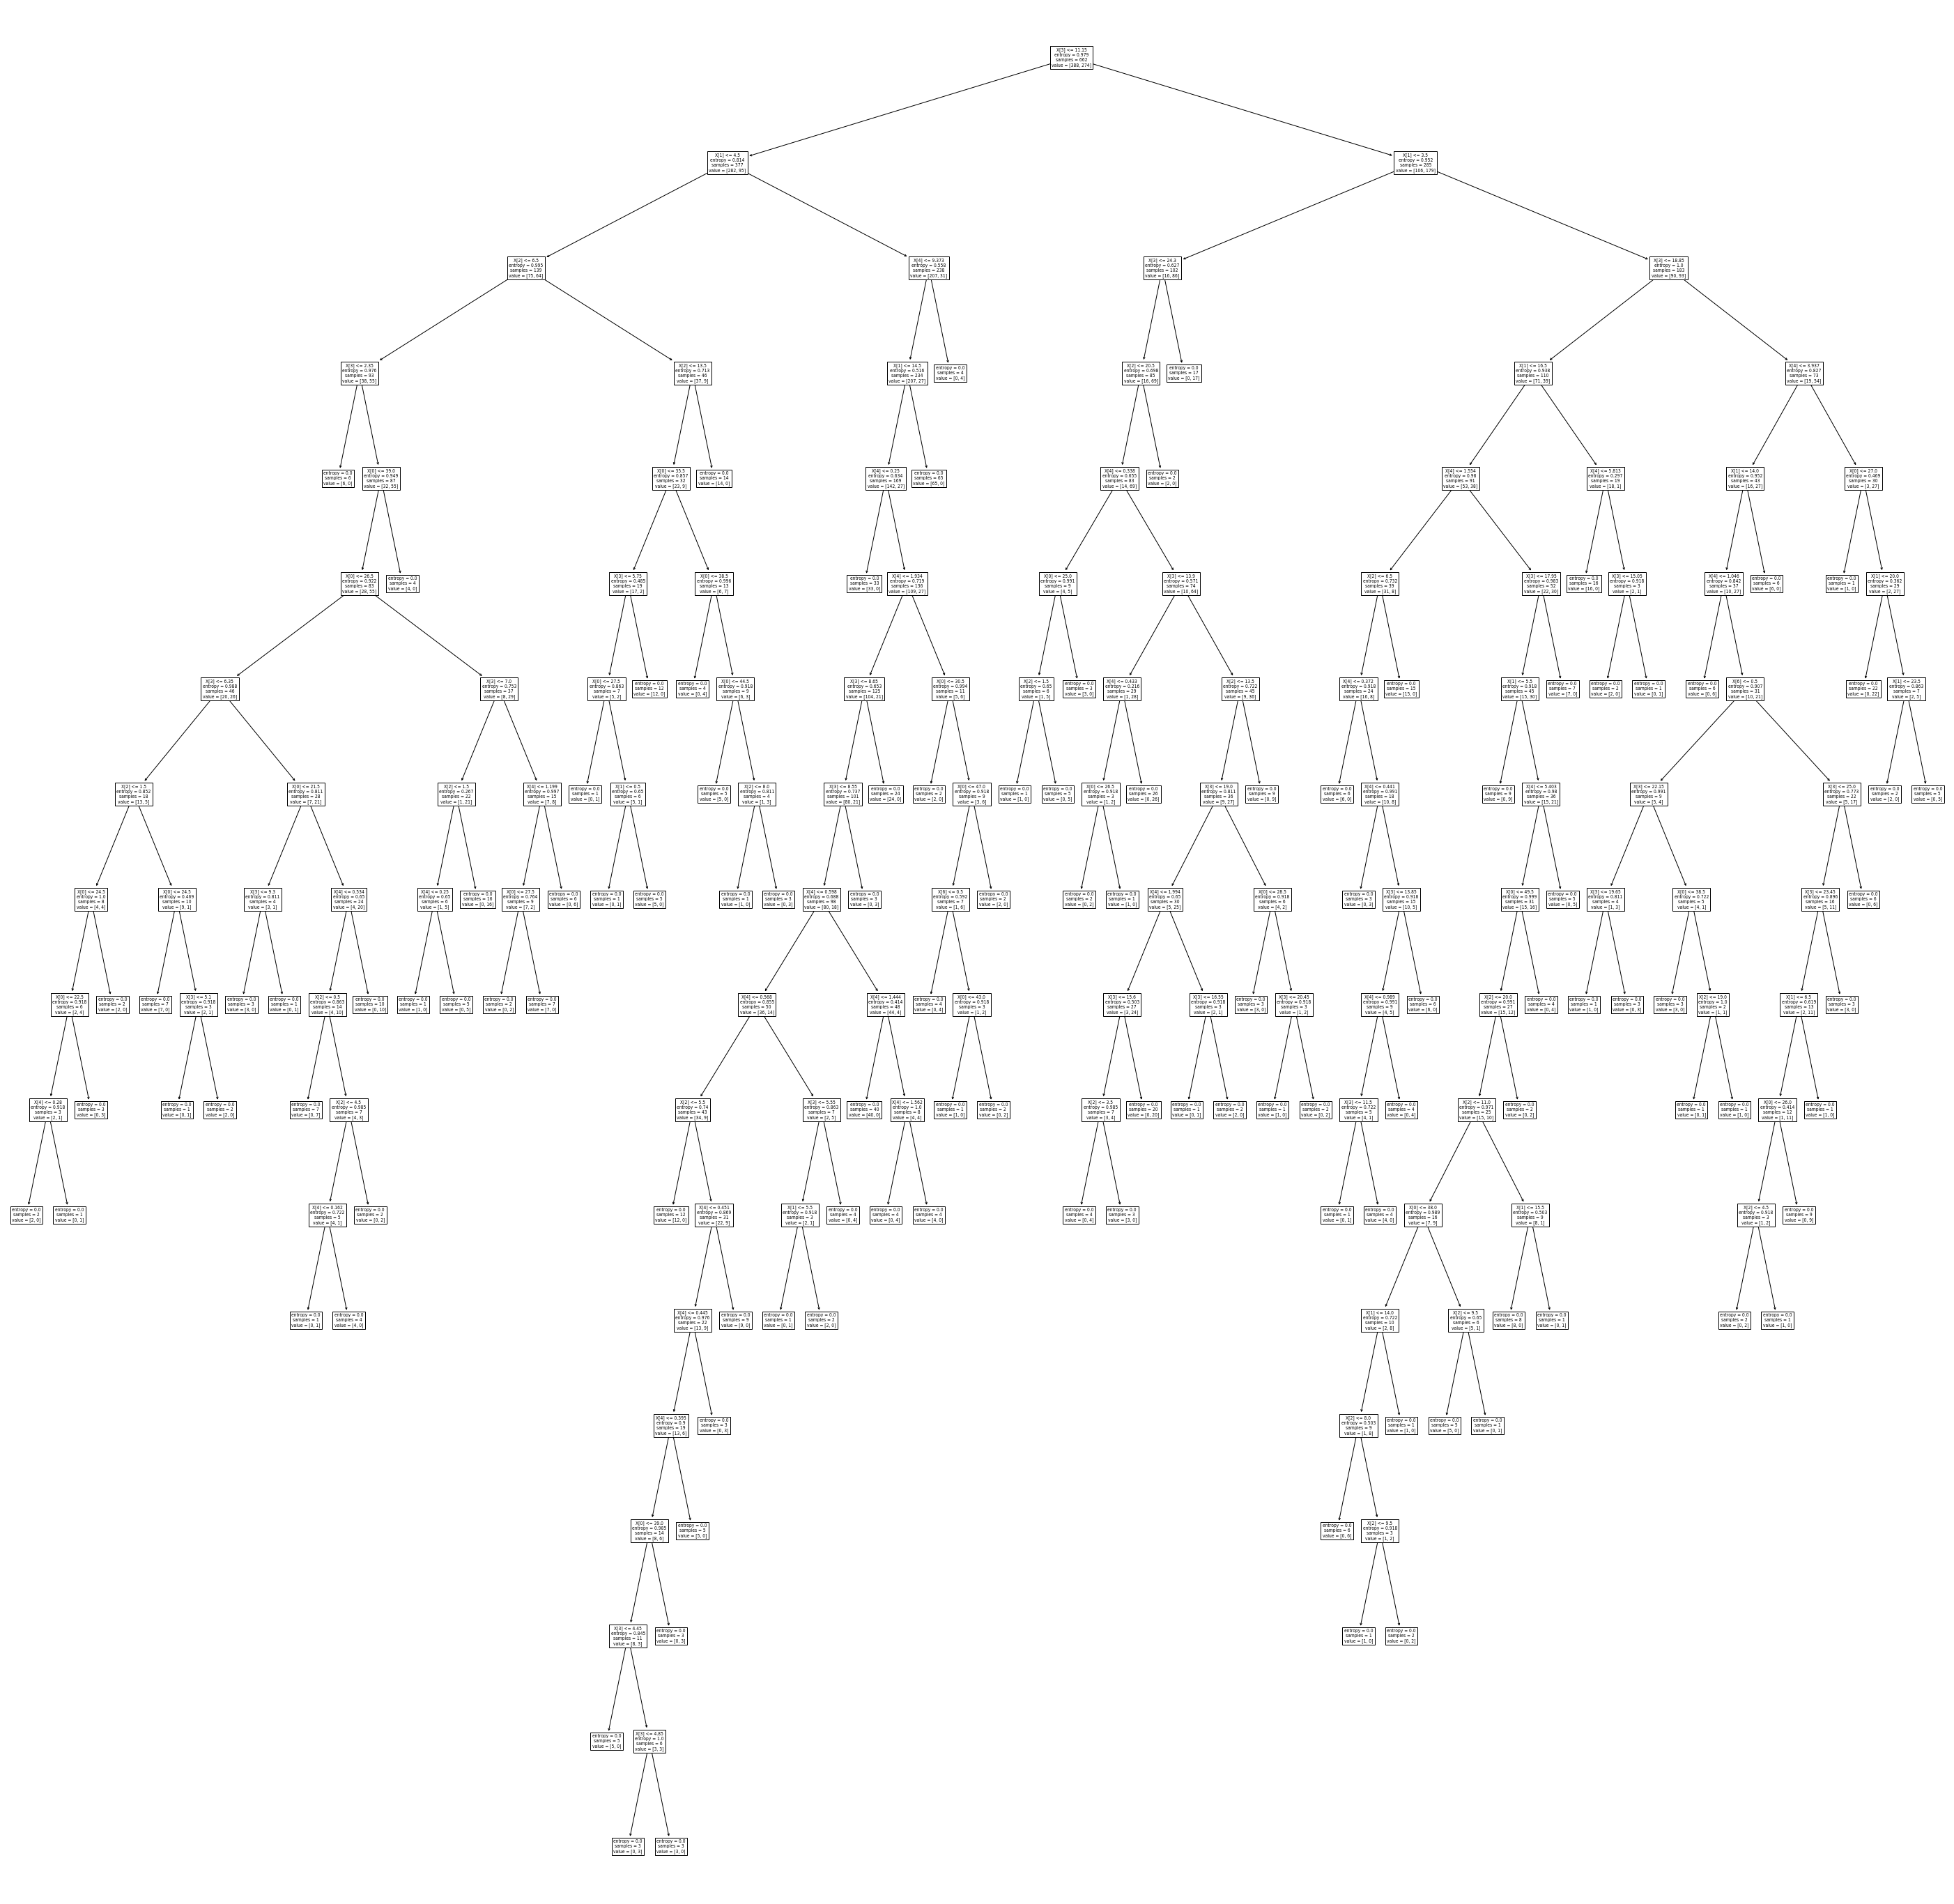

In [48]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(model)
plt.show()